In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_urls = [
    ("bukhari", 97),
    ("muslim", 56),
    ("nasai", 51),
]

In [3]:
hadith = []
for collection, hadith_count in base_urls:
    print(f"Scraping Hadith from {collection} collection...")
    for hadith_number in range(1, hadith_count + 1):
        hadith_url = f"https://sunnah.com/{collection}/{hadith_number}"
        response = requests.get(hadith_url)
        print("Scraping from:", hadith_url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            hadith_text = soup.find("div", class_="text_details").get_text(strip=True)
            narrated_by = soup.find("div", class_="hadith_narrated").get_text(strip=True)
            hadith.append((collection, hadith_number, narrated_by, hadith_text))
        else:
            print(f"Error from {hadith_url}")

Scraping Hadith from bukhari collection...
Scraping from: https://sunnah.com/bukhari/1
Scraping from: https://sunnah.com/bukhari/2
Scraping from: https://sunnah.com/bukhari/3
Scraping from: https://sunnah.com/bukhari/4
Scraping from: https://sunnah.com/bukhari/5
Scraping from: https://sunnah.com/bukhari/6
Scraping from: https://sunnah.com/bukhari/7
Scraping from: https://sunnah.com/bukhari/8
Scraping from: https://sunnah.com/bukhari/9
Scraping from: https://sunnah.com/bukhari/10
Scraping from: https://sunnah.com/bukhari/11
Scraping from: https://sunnah.com/bukhari/12
Scraping from: https://sunnah.com/bukhari/13
Scraping from: https://sunnah.com/bukhari/14
Scraping from: https://sunnah.com/bukhari/15
Scraping from: https://sunnah.com/bukhari/16
Scraping from: https://sunnah.com/bukhari/17
Scraping from: https://sunnah.com/bukhari/18
Scraping from: https://sunnah.com/bukhari/19
Scraping from: https://sunnah.com/bukhari/20
Scraping from: https://sunnah.com/bukhari/21
Scraping from: https:

In [4]:
df = pd.DataFrame(hadith, columns=["Collection", "Hadith Number", "Narrated By", "Hadith Text"])

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Hadith Text"])
svd = TruncatedSVD(n_components=50)
reduced_matrix = svd.fit_transform(tfidf_matrix)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(reduced_matrix)
pillar_criteria = {
    "Shahada": ["faith", "testimony", "witness", "worshipped"],
    "Salat": ["prayer", "ritual", "worship", "mosque", "clean"],
    "Zakat": ["charity", "almsgiving", "poor", "money", "property"],
    "Sawm": ["fasting", "Ramadan", "abstain", "patience"],
    "Hajj": ["pilgrimage", "Mecca", "Kaaba", "Hajj"]
}

In [5]:
def categorize_hadith(hadith_text):
    for pillar, keywords in pillar_criteria.items():
        for keyword in keywords:
            if keyword in hadith_text:
                return pillar
    return "Others"

df["Pillar"] = df["Hadith Text"].apply(categorize_hadith)

In [10]:
df.to_csv("hadith.csv", index = False)

In [11]:
data = pd.read_csv("hadith.csv")
data

,Collection,Hadith Number,Narrated By,Hadith Text,Cluster,Pillar
0,bukhari,1,Narrated 'Umar bin Al-Khattab:,"I heard Allah's Messenger (ﷺ) saying, ""The rew...",2,Others
1,bukhari,2,Narrated Ibn 'Umar:,Allah's Messenger (ﷺ) said: Islam is based on ...,0,Shahada
2,bukhari,3,Narrated Abu Huraira:,While the Prophet (ﷺ) was saying something in ...,3,Others
3,bukhari,4,Narrated Abu Huraira:,"Allah's Messenger (ﷺ) said, ""The prayer of a p...",2,Salat
4,bukhari,5,Narrated `Aisha:,Whenever the Prophet (ﷺ) took a bath after Jan...,1,Salat
...,...,...,...,...,...,...
199,nasai,47,It was narrated from Abu Hurairah that:,"The Messenger of Allah [SAW] was asked: ""Which...",1,Others
200,nasai,48,It was narrated from 'Aishah that:,"The Messenger of Allah [SAW] said: ""Ten things...",1,Others
201,nasai,49,It was narrated from 'Abdullah bin 'Amr bin Al...,"The Prophet [SAW] said: ""Those who are just an...",1,Others
202,nasai,50,It was narrated from Mu'adh bin 'Abdullah that...,"""It was raining and dark, and we were waiting ...",3,Salat


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Salat'),
  Text(2, 0, 'Shahada'),
  Text(3, 0, 'Zakat'),
  Text(4, 0, 'Hajj'),
  Text(5, 0, 'Sawm')])

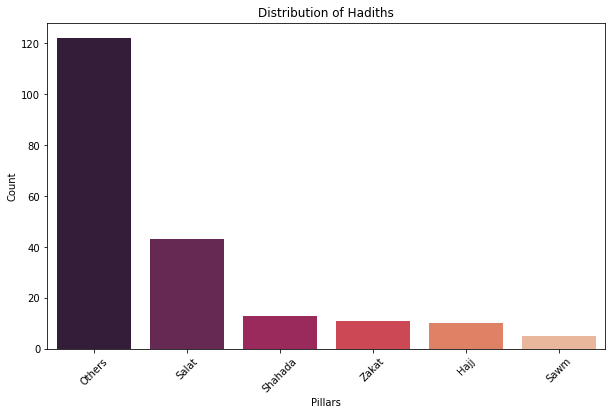

In [13]:
counts = data['Pillar'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x = counts.index, y = counts.values, palette = 'rocket')
plt.title('Distribution of Hadiths')
plt.xlabel('Pillars')
plt.ylabel('Count')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

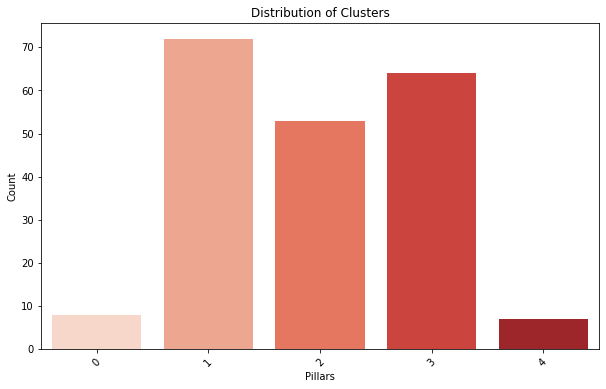

In [16]:
counts = data['Cluster'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x = counts.index, y = counts.values, palette = 'Reds')
plt.title('Distribution of Clusters')
plt.xlabel('Pillars')
plt.ylabel('Count')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'bukhari'), Text(1, 0, 'muslim'), Text(2, 0, 'nasai')])

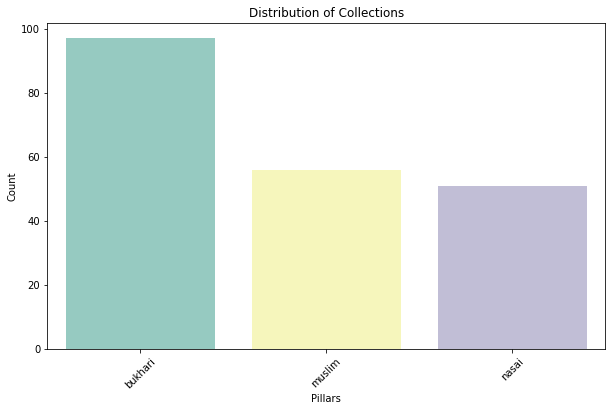

In [18]:
counts = data['Collection'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x = counts.index, y = counts.values, palette = 'Set3')
plt.title('Distribution of Collections')
plt.xlabel('Pillars')
plt.ylabel('Count')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of Hadith Numbers')

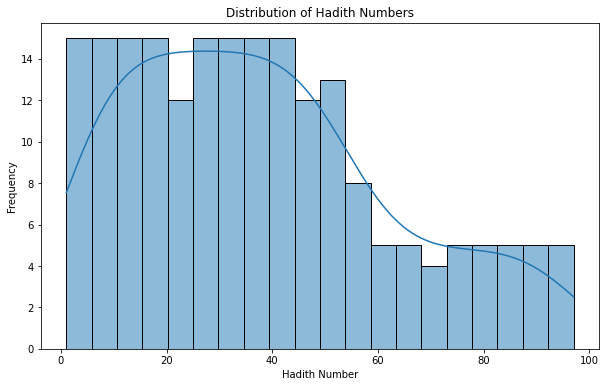

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Hadith Number'], bins=20, kde=True)
plt.xlabel('Hadith Number')
plt.ylabel('Frequency')
plt.title('Distribution of Hadith Numbers')